# 第三章 多边形三角划分：画廊剖分

## 3.1  定理
* 定理3.1.1：任何简单多边形都存在（至少）一个三角形剖分；若其顶点数目为 n ，则它的每个三角形剖分都恰好包含 n-2 个三角形 
  
- 定理3.1.2：包含n个顶点的任何简单多边形，只需（放置在适当的位置的）$\dfrac{1}{n}$ 台摄像机就能保证：其中任何一点都可见于至少一台摄像机。有的时候，的确需要这样多台摄像机。

* 定理3.1.3：任意给一个包含 n 个顶点的简单多边形 P ,总可以在O(nlogn)时间内，在P内确定$\dfrac{1}{n}$ 台摄像机的位置。

## 3.2  多边形的单调块划分
* 单调：一个简单的多边形称为“关于某条直线l单调”，则对任何垂直于l的直线与该多边形的交都是连通的。
* 单调块定义：关于某条直线l单调，则称它为l单调。

多边形的顶点可划分为五类：
1. 起始顶点：相邻两个顶点的高度都比他低，而且该处内角小于Π。
2. 分裂顶点：相邻两个顶点的高度都比他低，而且该处内角大于Π。
3. 终止顶点：相邻两个顶点的高度都比他高，而且该处内角小于Π。
4. 汇合顶点：相邻两个顶点的高度都比他高，而且该处内角大于Π。
5. 普通顶点：相邻两点一高一低。

- 定理3.2.1：一个多边形若既不含分裂顶点，也不含汇合顶点，则必然是y单调的。
* 定理3.2.2：通过引入一系列互不相交的对角线，算法MAKEMONOTONE能够将一个简单多边形划分为多个单调子多边形。
* 定理3.2.3：使用O(n)的储存空间，可以在O(nlogn)时间内对包含n个顶点的任一简单多边形分解为多个y单调的子块。

ps:只有单调多边形才能进行三角拆分

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def xy_sort(a):  #将多边形的顶点按照y轴由大到小排列，若y轴大小一样，则x小的在前
    b=[]
    for i in range(len(a)):
        for j in range(i,len(a)):
            if (a[i][1]<a[j][1]):
                   a[i],a[j]=a[j],a[i]

            if (a[i][1]==a[j][1]):
                if(a[i][0]>a[j][0]):
                    a[i],a[j]=a[j],a[i]
    for k in range(len(a)):
        b.append(a[k])
    return b

我们采用扫描线的策略，将顶点按照y坐标排列放入事件队列，每次扫描线都是在顶点所在的与x轴平行的直线上并且进行自上而下的扫描。
由定义可以知道，当一条扫描线不能连续的穿过多边形时，我们就需要做一些必要的切割。
并且我们只需要连接分裂顶点/汇合顶点和它们的上一个扫描过的顶点即可完成划分，具体算法如下

In [31]:
def MakeMonotone_vertex(poly_arr,Z):  #poly_arr:多边形顶点按照逆时针排序，Z:顶点排序后得到的序列
    x_vertex=[]
    y_vertex=[]
    # 上半部分
    while Z!=[]:
        start_vertex = Z[0]
        if poly_arr.index(start_vertex)==0:
            pre = poly_arr[len(poly_arr) - 1];
            succ = poly_arr[1];
        if poly_arr.index(start_vertex)==len(poly_arr) - 1:
            pre = poly_arr[poly_arr.index(start_vertex) - 1];
            succ = poly_arr[0];
        else:
            pre = poly_arr[poly_arr.index(start_vertex) - 1];
            succ= poly_arr[poly_arr.index(start_vertex) + 1];

        if (len(Z) > int(len(poly_arr)/2)):         #上半部分
            PreTmp=start_vertex;
            Z.pop(0);
            next=Z[0];
            # 如果当前顶点的y值比相邻两顶点的y值小
            if start_vertex[1] < pre[1] and start_vertex[1] < succ[1]:
                x_vertex.append(start_vertex[0])
                x_vertex.append(next[0])
                y_vertex.append(start_vertex[1])
                y_vertex.append(next[1])
        else:
            if start_vertex[1] > pre[1] and start_vertex[1] > succ[1]:
                x_vertex.append(start_vertex[0])
                x_vertex.append(PreTmp[0])
                y_vertex.append(start_vertex[1])
                y_vertex.append(PreTmp[1])
            Z.pop(0)
        PreTmp=start_vertex
    return x_vertex,y_vertex

[2, 2, 1, 3] [5, 4, 1.2, 3]


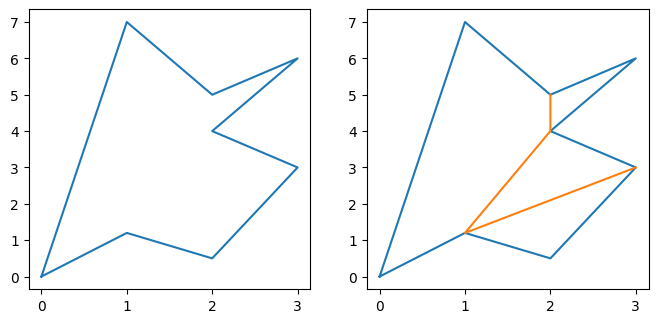

In [32]:
poly_arr = [(0, 0), (1, 1.2), (2, 0.5), (3, 3), (2, 4), (3, 6), (2, 5), (1, 7), (0, 0)]  # 顶点序列(逆时针)
poly = np.array(poly_arr)  # 构造多边形
Z=xy_sort(poly_arr)
poly_arr= [(0, 0), (1, 1.2), (2, 0.5), (3, 3), (2, 4), (3, 6), (2, 5), (1, 7), (0, 0)]
x,y=MakeMonotone_vertex(poly_arr,Z)
print(x,y)
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(poly.T[0],poly.T[1])

plt.subplot(2, 2, 2)
plt.plot(poly.T[0],poly.T[1])
plt.plot(x,y)
plt.show()



#### 补充 
[双向链接边表（DCEL）](https://www.bilibili.com/video/BV13o4y1Q7eH/?p=27&vd_source=9389d749ab362b60a13c037e93aabcd5)

## 3.3 单调多边形的三角剖分

现在，我们已经得到了单调多边形，接下来我们讨论单调多边形的三角剖分

* 引理3.3.1：由n个顶点组成的任一严格y单调多边形，都可以在线性时间内被三角剖分。
* 定理3.3.2：使用O(n)的储存空间，可以在O(nlogn)时间内对由n个顶点组成的任一简单多边形进行三角剖分。
* 定理3.3.3：使用O(n)的储存空间，可以在O(nlogn)时间内对包含n个顶点的任一平面子区域划分进行三角剖分。

实现ToLeft测试方法有很多,最经典的是使用求解矩阵行列式求解有向面积的方式。
设两个点p和q,测试点s是在pq连线的左侧还是右侧,
在area函数中，计算有向面积,ToLeft测试是判断是否在直线的左侧,当这个有向面积大于0的时候,在左侧,当小于0的时候,在右侧,当等于0 的时候,三点一线,面积为0。
在Toleft函数中，我们取三个点组成的三角形的重心，与多边形的每一条边都进行一次toleft判断。只用当重心对任何一条边而言都在同一边，才能将该三角形划分出来。

In [33]:
def area(p,q,s):
    areas=p[0] * q[1] - p[1]* q[0] + q[0] * s[1] - q[1] * s[0] + s[0] * p[1] - s[1] * p[0]
    if areas > 0:
        return 1
    if areas <= 0:
        return -1

def Toleft(w,e,r,poly_arr):
    a_point=((w[0]+e[0]+r[0])/3,(w[1]+e[1]+r[1])/3)
    sum=0
    for i in range(len(poly_arr)-1):
        a=poly_arr[i]
        b=poly_arr[i+1]
        sum=sum+area(a,b,a_point)
    sum+=area(poly_arr[-1],poly_arr[0],a_point)
    if abs(sum)==len(poly_arr):
        return 1
    else:
        return 0

In [34]:
def Triangulate_Monotone_Polygon(poly_arr,Z):     #Z为单调多边形顶点排列后的顺序
    waitpoint=[]
    #在waitpoint中初始化两个顶点
    plt.subplot(2, 2, 2)
    waitpoint.append(Z[0])
    Z.pop(0)
    waitpoint.append(Z[0])
    Z.pop(0)
    while Z!=[]:
        tem=Z[0]
        while len(waitpoint)>1:
            first=waitpoint[-1]
            waitpoint.pop()
            second=waitpoint[-1]
            waitpoint.pop()
            if poly_arr.index(tem)==poly_arr.index(first)+1:     #即tem与first是相邻的两点 
                if Toleft(second, first, tem,poly_arr):       #进行toleft判断后，将tem与弹出的每一个顶点进行连接
                    plt.plot((tem[0], first[0]), (tem[1], first[1]))
                    plt.plot((tem[0], second[0]), (tem[1], second[1]))
                    waitpoint.append(first)
                else:
                    waitpoint.append(second)
                    waitpoint.append(first)
                    waitpoint.append(tem)
                    break

            else:
                plt.plot((tem[0], first[0]), (tem[1], first[1]))
                plt.plot((tem[0], second[0]), (tem[1], second[1]))
                waitpoint.append(first)
        waitpoint.append(tem)
        Z.pop(0)

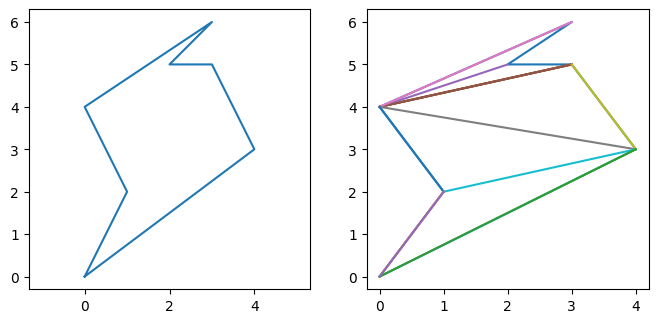

In [35]:
poly_arr = [(0, 0), (1, 2), (0, 4), (3, 6), (2, 5), (3, 5), (4, 3), (0, 0)]
poly=np.array(poly_arr)
Z=xy_sort(poly_arr)
poly_arr = [(0, 0), (1, 2), (0, 4), (3, 6), (2, 5), (3, 5), (4, 3), (0, 0)]

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(poly.T[0],poly.T[1])
plt.axis("equal")

plt.subplot(2, 2, 2)
plt.plot(poly.T[0],poly.T[1])
Triangulate_Monotone_Polygon(poly_arr,Z)

plt.show()